## Análisis Exploratorio de Datos (EDA)

En este apartado, llevaremos a cabo el proceso de Análisis Exploratorio de Datos (EDA) de los datasets limpios:

- homicidios_cleaned.csv
- lesiones_cleaned.csv

El objetivo es comprender la estructura de los datos, abordar posibles outliers, identificar duplicados y gestionar valores faltantes. La riqueza de este análisis radica en la capacidad de revelar patrones, tendencias y relaciones entre variables, todo respaldado por visualizaciones pertinentes.

A través de este proceso, buscamos extraer información valiosa que impulse futuras investigaciones y acciones relacionadas con la seguridad vial en la Ciudad de Buenos Aires - Argentina.

### 1. Importación de las bibliotecas necesarias

In [1]:
# Pandas para el análisis de datos tabulares
import pandas as pd

# NumPy proporciona soporte para arreglos y matrices multidimensionales
import numpy as np

# Matplotlib para la creación de gráficos y visualizaciones
import matplotlib.pyplot as plt

# Seaborn para la visualización de datos mediante gráficos estadísticos
import seaborn as sns

# Calendar proporciona funciones para trabajar con calendarios
import calendar

# Funciones útiles
from functions import data_cleaning
from functions import convertir_a_datetime

### 2. Carga de datos

In [2]:
df_homicidios = pd.read_csv('../Archivos_Limpios/homicidios_cleaned.csv')
df_lesiones = pd.read_csv('../Archivos_Limpios/lesiones_cleaned.csv')

In [3]:
df_homicidios.head()

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad
0,2016-0001,1,2016-01-01,4.0,avenida,8,-58.475340,-34.687570,moto,auto,conductor,masculino,19.0,fatal
1,2016-0002,1,2016-01-02,1.0,gral paz,9,-58.508775,-34.669777,auto,pasajeros,conductor,masculino,70.0,fatal
2,2016-0003,1,2016-01-03,7.0,avenida,1,-58.390403,-34.631894,moto,auto,conductor,masculino,30.0,fatal
3,2016-0004,1,2016-01-10,0.0,avenida,8,-58.465039,-34.680930,moto,NaN,conductor,masculino,18.0,fatal
4,2016-0005,1,2016-01-21,5.0,avenida,1,-58.387183,-34.622466,moto,pasajeros,conductor,masculino,29.0,fatal


In [4]:
df_lesiones.head()

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad
0,LC-2019-0000179,1,2019-01-01 00:00:00,9.0,NaN,14.0,-58.408911,-34.559658,ciclista,NaN,NaN,NaN,NaN,leve
1,LC-2019-0000053,1,2019-01-01 00:00:00,1.0,NaN,8.0,-58.443510,-34.669125,auto,NaN,NaN,masculino,57.0,leve
2,LC-2019-0000063,1,2019-01-01 00:00:00,2.0,NaN,8.0,-58.468335,-34.677556,NaN,NaN,NaN,NaN,NaN,leve
3,LC-2019-0000079,1,2019-01-01 00:00:00,2.0,NaN,7.0,-58.437425,-34.647349,peaton,NaN,NaN,masculino,NaN,leve
4,LC-2019-0000082,4,2019-01-01 00:00:00,4.0,NaN,3.0,-58.398225,-34.604579,auto,NaN,NaN,masculino,45.0,leve


### 3. Exploración de los conjuntos de datos

In [5]:
# Mostramos el tamaño de los DataFrames
print(f"Tamaño del DataFrame: df_homicidios: {df_homicidios.shape}")
print(f"Tamaño del Dataframe: df_lesiones: {df_lesiones.shape}")

Tamaño del DataFrame: df_homicidios: (717, 14)
Tamaño del Dataframe: df_lesiones: (27599, 14)


Creamos nuevos DataFrames para observar la cantidad de datos nulos en ambos conjuntos de datos.

In [6]:
# Obtenemos el conteo de nulos por columna del DataFrame df_homicidios
null_count = df_homicidios.isnull().sum()

# Obtenemos el porcentaje de nulos por columna
null_percentage = (df_homicidios.isnull().mean()) * 100

# Creamos un nuevo DataFrame con la información de conteo y porcentaje
null_info = pd.DataFrame({"Nulos": null_count, "Porcentaje": null_percentage})

# Imprimimos el nuevo DataFrame
print(null_info)

                  Nulos  Porcentaje
id_siniestro          0    0.000000
nro_victimas          0    0.000000
fecha                 0    0.000000
franja_hora           1    0.139470
tipo_calle            0    0.000000
comuna                0    0.000000
longitud              0    0.000000
latitud               0    0.000000
vehiculo_victima      9    1.255230
vehiculo_acusado     23    3.207810
rol                  11    1.534170
sexo                  6    0.836820
edad                 53    7.391911
gravedad              0    0.000000


La columna "franja_hora" tiene solo un valor nulo, lo cual no es significativo.
Las columnas "vehiculo_victima", "vehiculo_acusado", "rol", "sexo" y "edad" tienen algunos nulos, pero en términos porcentuales son relativamente bajos.

In [7]:
# Obtenemos el conteo de nulos por columna del DataFrame df_lesiones
null_count = df_lesiones.isnull().sum()

# Obtenemos el porcentaje de nulos por columna
null_percentage = (df_lesiones.isnull().mean()) * 100

# Creamos un nuevo DataFrame con la información de conteo y porcentaje
null_info = pd.DataFrame({"Nulos": null_count, "Porcentaje": null_percentage})

# Imprimimos el nuevo DataFrame
print(null_info)

                  Nulos  Porcentaje
id_siniestro          0    0.000000
nro_victimas          0    0.000000
fecha                 0    0.000000
franja_hora           9    0.032610
tipo_calle        12880   46.668358
comuna             1625    5.887894
longitud           1657    6.003841
latitud            1657    6.003841
vehiculo_victima  12823   46.461828
vehiculo_acusado  17919   64.926265
rol               27599  100.000000
sexo               2228    8.072756
edad               4471   16.199862
gravedad              0    0.000000


Las columnas "franja_hora", "comuna", "longitud", "latitud", "sexo", "edad", "tipo_calle", "vehiculo_victima", "vehiculo_acusado", "rol" todas tienen nulos pero para las cuatro últimas columnas mencionadas el porcentaje es considerable pues superan el 45%.

#### Transformaciones adicionales

In [8]:
# Concatenamos los dos DataFrames verticalmente 
siniestros = pd.concat([df_homicidios, df_lesiones], ignore_index=True)

In [9]:
# Verificamos el resultado observando el tamaño de nuevo DataFrame
print(siniestros.shape) 

(28316, 14)


In [10]:
# Observamos el resultado
siniestros.head(3)

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad
0,2016-0001,1,2016-01-01,4.0,avenida,8.0,-58.475340,-34.687570,moto,auto,conductor,masculino,19.0,fatal
1,2016-0002,1,2016-01-02,1.0,gral paz,9.0,-58.508775,-34.669777,auto,pasajeros,conductor,masculino,70.0,fatal
2,2016-0003,1,2016-01-03,7.0,avenida,1.0,-58.390403,-34.631894,moto,auto,conductor,masculino,30.0,fatal


Trabajaremos con la columna "fecha", primero la convertiremos a datatime y posteriormente tomamos solo el año para renombrar la columna a "year". Finalmente crearemos nuevas columnas: "month", "quarter" y "semester".

In [11]:
# Llamamos ala función "convertir_a_datetime"
siniestros["fecha"] = siniestros["fecha"].apply(convertir_a_datetime)

In [12]:
# Creamos las nuevas columnas
siniestros["year"] = siniestros["fecha"].dt.year
siniestros["month"] = siniestros["fecha"].dt.month
siniestros["quarter"] = siniestros["fecha"].dt.quarter
siniestros["semester"] = siniestros["fecha"].dt.month.apply(lambda x: 1 if x <= 6 else 2)

Preparamos los datos que usaremos al llamar a la función "data_cleaning".

In [13]:
# Columnas que agregaremos
new_columns_dict = {"year":"year", "month":"month", "quarter":"quarter", "semester":"semester"}

# Columnas que convertiremos a entero
columns_to_int = ["nro_victimas", "franja_hora", "comuna", "edad"]

# Columnas que categorizaremos
columns_to_categorize = ["franja_hora", "tipo_calle", "comuna", "vehiculo_victima", "vehiculo_acusado", "rol", "sexo", "edad", "gravedad"]

In [14]:
# Llamamos a la función "data_cleaning"
siniestros_cleaned = data_cleaning(siniestros,
                              new_columns2=new_columns_dict,  #Agregar columnas
                              convert_to_int_columns=columns_to_int, #Conversión entero  
                              categorize_columns=columns_to_categorize # Categorizar columnas
                             )

### 4. Exploración del conjunto de datos unificado

In [15]:
siniestros_cleaned.head()

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad,year,month,quarter,semester
0,2016-0001,1,2016-01-01,4,avenida,8,-58.475340,-34.687570,moto,auto,conductor,masculino,19,fatal,2016,1,1,1
1,2016-0002,1,2016-01-02,1,gral paz,9,-58.508775,-34.669777,auto,pasajeros,conductor,masculino,70,fatal,2016,1,1,1
2,2016-0003,1,2016-01-03,7,avenida,1,-58.390403,-34.631894,moto,auto,conductor,masculino,30,fatal,2016,1,1,1
3,2016-0004,1,2016-01-10,0,avenida,8,-58.465039,-34.680930,moto,NaN,conductor,masculino,18,fatal,2016,1,1,1
4,2016-0005,1,2016-01-21,5,avenida,1,-58.387183,-34.622466,moto,pasajeros,conductor,masculino,29,fatal,2016,1,1,1


In [16]:
siniestros_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28316 entries, 0 to 28315
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_siniestro      28316 non-null  object        
 1   nro_victimas      28316 non-null  Int64         
 2   fecha             28316 non-null  datetime64[ns]
 3   franja_hora       28306 non-null  Int64         
 4   tipo_calle        15436 non-null  category      
 5   comuna            26691 non-null  Int64         
 6   longitud          26659 non-null  float64       
 7   latitud           26659 non-null  float64       
 8   vehiculo_victima  15484 non-null  category      
 9   vehiculo_acusado  10374 non-null  category      
 10  rol               706 non-null    category      
 11  sexo              26082 non-null  category      
 12  edad              23792 non-null  Int64         
 13  gravedad          28316 non-null  category      
 14  year              2831

#### Valores Faltantes

In [17]:
# Calculamos el porcentaje de valores nulos por columna
porcentaje_nulos = siniestros_cleaned.isnull().mean() * 100

# Filtramos por víctimas fatales
victimas_fatales = siniestros_cleaned[siniestros_cleaned["gravedad"] == "fatal"]

# Calculamos el porcentaje de valores nulos por columna para víctimas fatales
porcentaje_nulos_fatales = victimas_fatales.isnull().mean() * 100

# Filtramos por lesionados (gravedad diferente de fatal)
vicimas_no_fatales = siniestros_cleaned[siniestros_cleaned["gravedad"] != "fatal"]

# Calculamos el porcentaje de valores nulos por columna para lesionados
porcentaje_nulos_no_fatales = vicimas_no_fatales.isnull().mean() * 100

# Asignamos colores
cmap_custom = sns.color_palette(["#00B894", '#B2BEC3'])

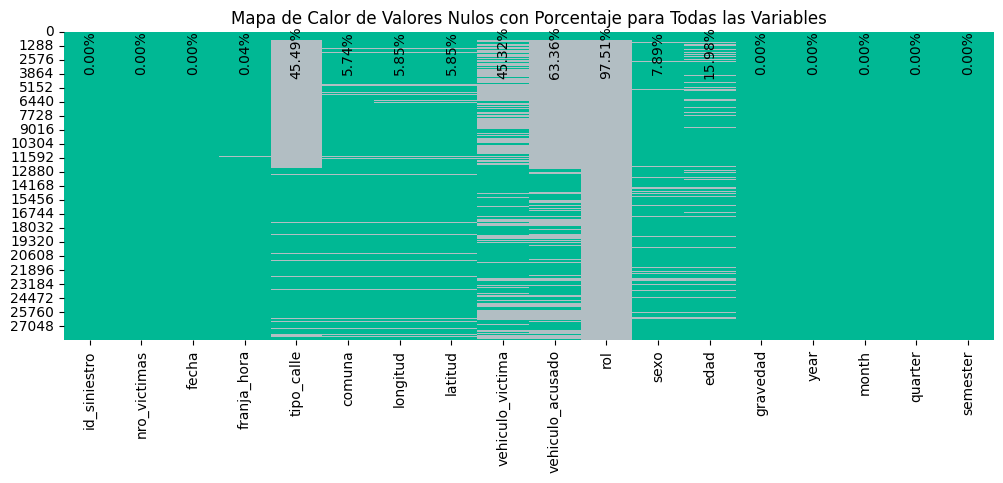

In [18]:
# Creamos un mapa de calor (heatmap) de valores nulos con el porcentaje
plt.figure(figsize=(12, 4))
sns.heatmap(siniestros_cleaned.isnull(), cbar=False, cmap=cmap_custom)

# Agregamos el texto con el porcentaje de nulos en cada columna
for col, porcentaje in porcentaje_nulos.items():
    plt.text(siniestros_cleaned.columns.get_loc(col) + 0.5, 1900, f"{porcentaje:.2f}%", rotation=90,
             va="center", ha="center", color="black")

plt.title('Mapa de Calor de Valores Nulos con Porcentaje para Todas las Variables')
plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_23452\3534186564.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_23452\3534186564.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


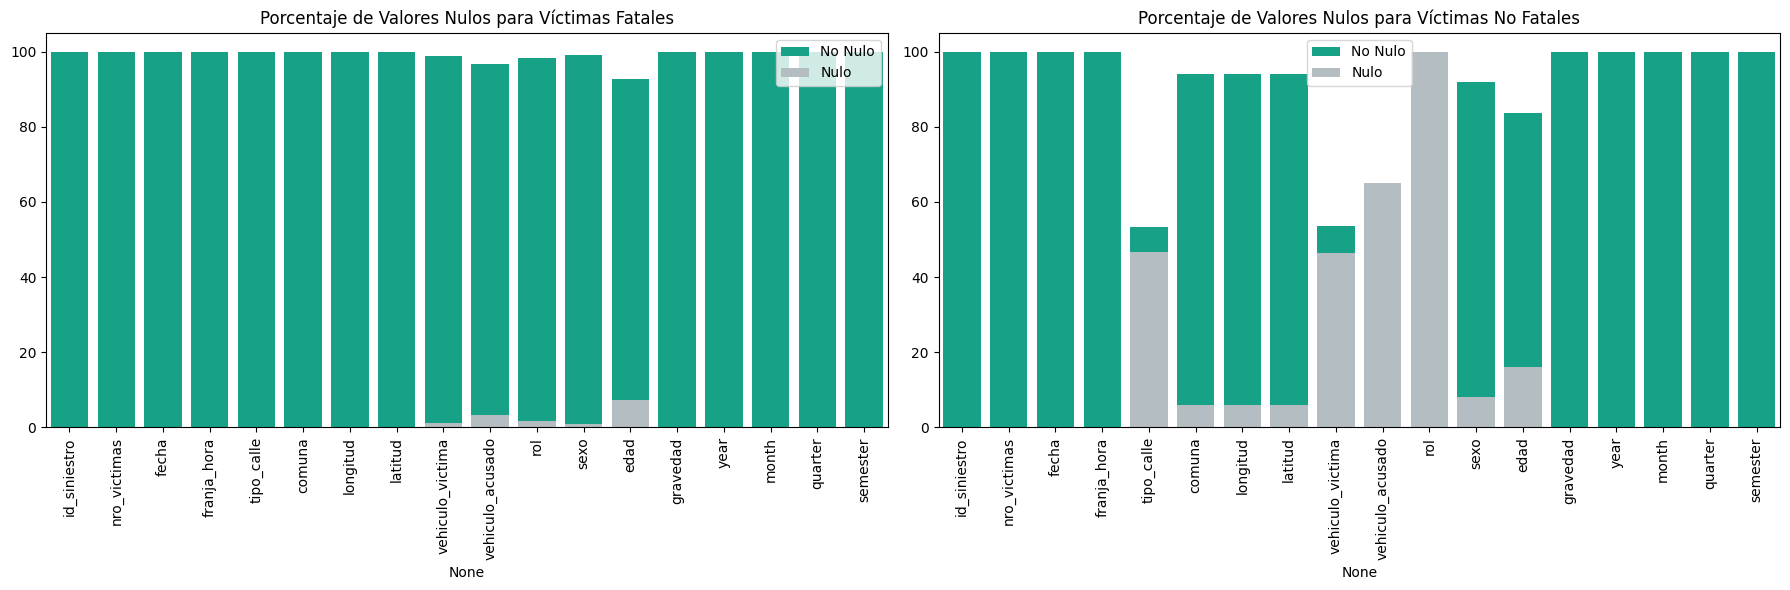

In [19]:
# Configuramos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Primer gráfico: Porcentaje de valores nulos para víctimas fatales
sns.barplot(x=porcentaje_nulos_fatales.index, y=100 - porcentaje_nulos_fatales.values, color=cmap_custom[0], label="No Nulo", ax=axes[0])
sns.barplot(x=porcentaje_nulos_fatales.index, y=porcentaje_nulos_fatales.values, color=cmap_custom[1], label="Nulo", ax=axes[0])
axes[0].set_title('Porcentaje de Valores Nulos para Víctimas Fatales')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].legend()

# Segundo gráfico: Porcentaje de valores nulos para víctimas no fatales
sns.barplot(x=porcentaje_nulos_no_fatales.index, y=100 - porcentaje_nulos_no_fatales.values, color=cmap_custom[0], label="No Nulo", ax=axes[1])
sns.barplot(x=porcentaje_nulos_no_fatales.index, y=porcentaje_nulos_no_fatales.values, color=cmap_custom[1], label="Nulo", ax=axes[1])
axes[1].set_title('Porcentaje de Valores Nulos para Víctimas No Fatales')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].legend()

# Ajustamos el espaciado entre subgráficos
plt.tight_layout()

# Mostramos los subgráficas
plt.show()

Según las gráficas, se puede obervar la existencia de valores nulos en ambos grupos, tanto en el de Víctimas Fatales como en el de Víctimas No Fatales, siendo este último el que denota mayor peso respecto a valores nulos, algo que se percibe en el Mapa de Calor.

Por ello, cuando abordemos las columnas con una cantidad significativa de valores ausentes, nos enfocaremos únicamente en los datos de siniestros viales con Víctimas Fatales, excluyendo así aquellos relacionados con siniestros viales con Víctimas No Fatales.

#### Duplicados

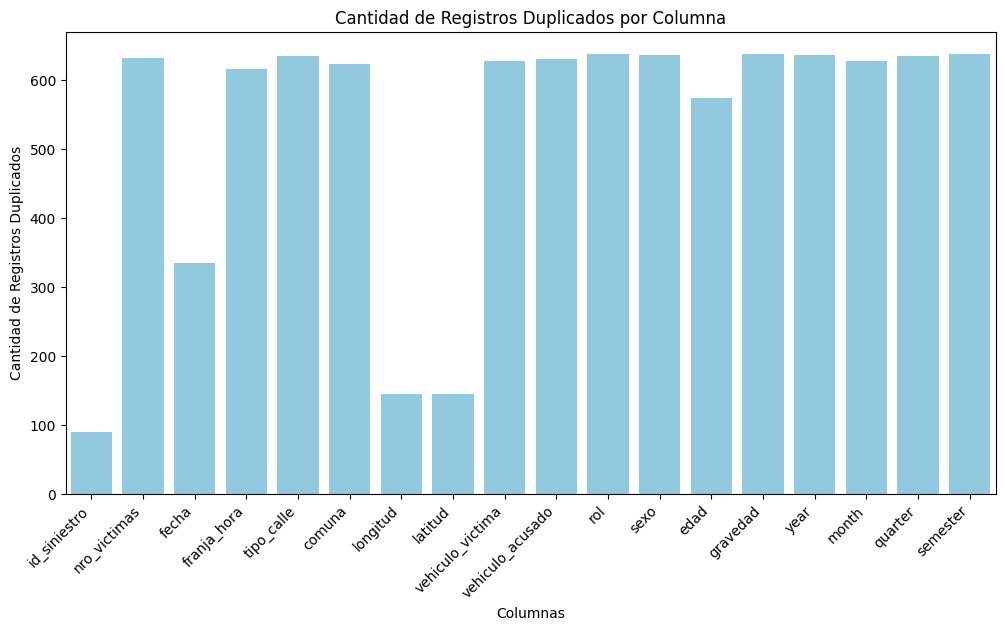

In [20]:
# Identificamos filas duplicadas en el DataFrame
filas_duplicadas = siniestros_cleaned[siniestros_cleaned.duplicated()]

# Contamos la cantidad de registros duplicados por columna
duplicados_por_columna = filas_duplicadas.apply(lambda x: x.duplicated().sum())

# Creamos un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=duplicados_por_columna.index, y=duplicados_por_columna.values, color="skyblue")
plt.title("Cantidad de Registros Duplicados por Columna")
plt.xlabel("Columnas")
plt.ylabel("Cantidad de Registros Duplicados")
plt.xticks(rotation=45, ha="right")

#Mostramos el gráfico
plt.show()

In [21]:
# Buscamos las filas duplicadas
siniestros[siniestros_cleaned.duplicated()]

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad,year,month,quarter,semester
796,LC-2019-0006638,2,2019-01-04,9.0,NaN,10.0,-58.496239,-34.636075,moto,NaN,NaN,masculino,37.0,leve,2019,1,1,1
812,LC-2019-0008238,2,2019-01-04,19.0,NaN,15.0,-58.479158,-34.590782,NaN,NaN,NaN,femenino,69.0,leve,2019,1,1,1
818,LC-2019-0008388,3,2019-01-04,20.0,NaN,15.0,-58.454242,-34.585794,NaN,NaN,NaN,femenino,NaN,leve,2019,1,1,1
835,LC-2019-0008860,3,2019-01-05,6.0,NaN,4.0,-58.412835,-34.655086,transporte publico,NaN,NaN,masculino,67.0,leve,2019,1,1,1
848,LC-2019-0009807,2,2019-01-05,20.0,NaN,9.0,-58.465951,-34.658307,NaN,NaN,NaN,masculino,40.0,leve,2019,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27912,LC-2021-0628972,8,2021-12-17,16.0,calle,11.0,-58.462417,-34.610534,auto,auto,NaN,NaN,NaN,leve,2021,12,4,2
27913,LC-2021-0628972,8,2021-12-17,16.0,calle,11.0,-58.462417,-34.610534,auto,auto,NaN,NaN,NaN,leve,2021,12,4,2
27983,LC-2021-0631292,5,2021-12-19,12.0,calle,12.0,-58.484141,-34.552869,NaN,NaN,NaN,femenino,NaN,grave,2021,12,4,2
27986,LC-2021-0631295,6,2021-12-19,12.0,calle,8.0,-58.480641,-34.679476,NaN,NaN,NaN,femenino,50.0,leve,2021,12,4,2


Se pudo notar que existen 639 registros duplicados.
Se tomó un "id_siniestro" de forma aleatoria para ver a detalle los registros duplciados.

In [22]:
id_siniestro_consulta = "LC-2021-0628972"
consulta_resultados = siniestros_cleaned[siniestros_cleaned["id_siniestro"] == id_siniestro_consulta]
consulta_resultados

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad,year,month,quarter,semester
27910,LC-2021-0628972,8,2021-12-17,16,calle,11,-58.462417,-34.610534,auto,auto,NaN,NaN,<NA>,leve,2021,12,4,2
27911,LC-2021-0628972,8,2021-12-17,16,calle,11,-58.462417,-34.610534,auto,auto,NaN,femenino,23,leve,2021,12,4,2
27912,LC-2021-0628972,8,2021-12-17,16,calle,11,-58.462417,-34.610534,auto,auto,NaN,NaN,<NA>,leve,2021,12,4,2
27913,LC-2021-0628972,8,2021-12-17,16,calle,11,-58.462417,-34.610534,auto,auto,NaN,NaN,<NA>,leve,2021,12,4,2
27914,LC-2021-0628972,8,2021-12-17,16,calle,11,-58.462417,-34.610534,auto,auto,NaN,masculino,35,leve,2021,12,4,2
27915,LC-2021-0628972,8,2021-12-17,16,calle,11,-58.462417,-34.610534,auto,auto,NaN,masculino,34,leve,2021,12,4,2
27916,LC-2021-0628972,8,2021-12-17,16,calle,11,-58.462417,-34.610534,auto,auto,NaN,masculino,33,leve,2021,12,4,2
27917,LC-2021-0628972,8,2021-12-17,16,calle,11,-58.462417,-34.610534,auto,auto,NaN,masculino,22,leve,2021,12,4,2


Se pudo observar que la cantidad de registros duplicados para el "id_siniestro_consulta" corresponde al número de víctimas del siniestro; es decir, se ha hecho un registro por cada víctima.
Con el fin de normalizar los datos, se implementa la estrategia de introducir una nueva columna "id_victima" que sirvacomo identificador único para cada víctima en un siniestro. En otras palabras, se asignará un número secuencial a cada víctima dentro de un incidente para diferenciarlas.

In [23]:
# Creamos una nueva columna para identificar a cada víctima
siniestros_cleaned["id_victima"] = siniestros_cleaned.groupby("id_siniestro").cumcount() + 1

In [24]:
# Consultamos nuevamente el id
id_siniestro_consulta = "LC-2021-0628972"
consulta_resultados = siniestros_cleaned[siniestros_cleaned["id_siniestro"] == id_siniestro_consulta]
consulta_resultados

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad,year,month,quarter,semester,id_victima
27910,LC-2021-0628972,8,2021-12-17,16,calle,11,-58.462417,-34.610534,auto,auto,NaN,NaN,<NA>,leve,2021,12,4,2,1
27911,LC-2021-0628972,8,2021-12-17,16,calle,11,-58.462417,-34.610534,auto,auto,NaN,femenino,23,leve,2021,12,4,2,2
27912,LC-2021-0628972,8,2021-12-17,16,calle,11,-58.462417,-34.610534,auto,auto,NaN,NaN,<NA>,leve,2021,12,4,2,3
27913,LC-2021-0628972,8,2021-12-17,16,calle,11,-58.462417,-34.610534,auto,auto,NaN,NaN,<NA>,leve,2021,12,4,2,4
27914,LC-2021-0628972,8,2021-12-17,16,calle,11,-58.462417,-34.610534,auto,auto,NaN,masculino,35,leve,2021,12,4,2,5
27915,LC-2021-0628972,8,2021-12-17,16,calle,11,-58.462417,-34.610534,auto,auto,NaN,masculino,34,leve,2021,12,4,2,6
27916,LC-2021-0628972,8,2021-12-17,16,calle,11,-58.462417,-34.610534,auto,auto,NaN,masculino,33,leve,2021,12,4,2,7
27917,LC-2021-0628972,8,2021-12-17,16,calle,11,-58.462417,-34.610534,auto,auto,NaN,masculino,22,leve,2021,12,4,2,8


In [25]:
# Verificamos la cantidad de duplicados
siniestros_cleaned[siniestros_cleaned.duplicated()]

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad,year,month,quarter,semester,id_victima


In [26]:
# Los archivos se almacenan en local 
siniestros_cleaned.to_csv("siniestros_cleaned.csv", index=False)

#### Análisis Descriptivo

La Estadísticas Descriptiva, como la media, la mediana, la desviación estándar, los cuartiles, entre otros, son herramientas clave que proporcionan una visión cuantitativa de la distribución de los datos y ayudan a comprender la tendencia central, la dispersión y la forma de la distribución.

In [26]:
# Configuramos el estilo de Seaborn
sns.set(style="whitegrid")

# Filtramos por gravedad igual a "fatal"
victimas_fatales = siniestros_cleaned[siniestros_cleaned["gravedad"] == "fatal"].drop(columns=["comuna", "id_victima"])

# Filtramos por gravedad diferente de "fatal"
victimas_no_fatales = siniestros_cleaned[siniestros_cleaned["gravedad"] != "fatal"].drop(columns=["comuna", "id_victima"])

# Seleccionamos columnas numéricas para el boxplot
columns_of_interest = ["nro_victimas", "franja_hora", "edad"]

# Llenamos los valores nulos con ceros para Víctimas Fatales
victimas_fatales_filled = victimas_fatales[columns_of_interest].fillna(0)

# Llenamos los valores nulos con ceros para Víctimas no Fatales
victimas_no_fatales_filled = victimas_no_fatales[columns_of_interest].fillna(0)

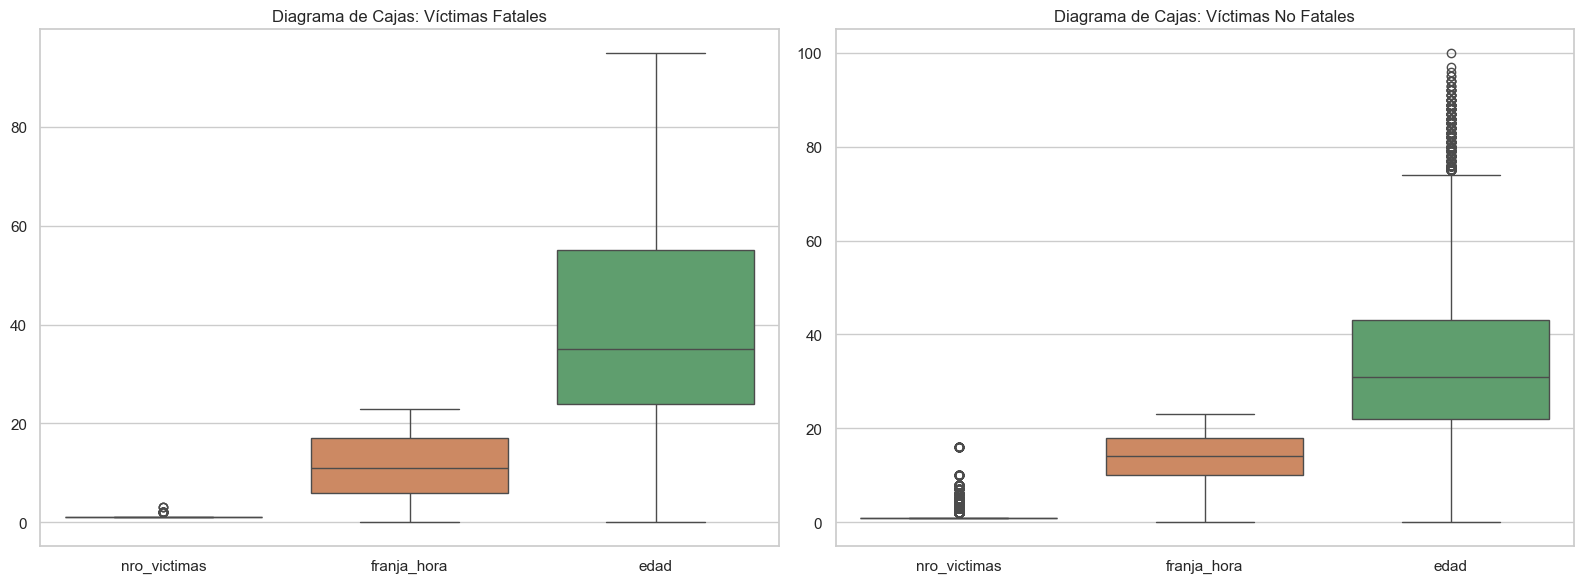

In [27]:
# Configuramos la disposición de subgráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Creamos un diagrama de cajas para Víctimas Fatales
sns.boxplot(data=victimas_fatales_filled, ax=axes[0])
axes[0].set_title("Diagrama de Cajas: Víctimas Fatales")

# Creamos un diagrama de cajas para Víctimas No Fatales
sns.boxplot(data=victimas_no_fatales_filled, ax=axes[1])
axes[1].set_title("Diagrama de Cajas: Víctimas No Fatales")

# Ajustamos el espaciado entre subgráficos
plt.tight_layout()

# Mostramos los gráficos
plt.show()

In [28]:
# Filtramos por gravedad igual a "fatal"
victimas_fatales = siniestros_cleaned[siniestros_cleaned["gravedad"] == "fatal"].drop(columns=["fecha", "comuna", "id_victima"])

# Descripción estadística para Víctimas Fatales
victimas_fatales.describe()

,nro_victimas,franja_hora,longitud,latitud,edad,year,month,quarter,semester
count,719.0,718.0,718.000000,718.000000,666.0,719.000000,719.000000,719.000000,719.000000
mean,1.061196,11.559889,-58.441728,-34.619622,42.145646,2018.179416,6.688456,2.549374,1.515994
std,0.256686,6.691543,0.046490,0.035742,19.764891,1.673093,3.578062,1.142980,0.500092
min,1.0,0.0,-58.529942,-34.705250,1.0,2016.000000,1.000000,1.000000,1.000000
25%,1.0,6.0,-58.477383,-34.644376,27.0,2017.000000,4.000000,2.000000,1.000000
50%,1.0,11.0,-58.444567,-34.622928,37.0,2018.000000,7.000000,3.000000,2.000000
75%,1.0,17.0,-58.401841,-34.596969,56.0,2019.500000,10.000000,4.000000,2.000000
max,3.0,23.0,-58.356082,-34.534654,95.0,2021.000000,12.000000,4.000000,2.000000


Víctimas Fatales:

- nro_victimas: La cantidad promedio de víctimas fatales por siniestro es aproximadamente 1.06, con un valor máximo de 3 víctimas en un siniestro.

- franja_hora: La franja horaria promedio en la que ocurren los siniestros fatales es alrededor de las 11:55 a.m., con un valor máximo de 23:00 (11:00 p.m.).

- edad: La edad promedio de las víctimas fatales es de aproximadamente 42 años, con una edad mínima de 1 año y una edad máxima de 95 años.

- year: Los siniestros fatales comprenden desde el año 2016 al 2021.

- month: La mayoría de los siniestros fatales parecen ocurrir con mayor frecuencia en los meses de junio y julio.

In [29]:
# Filtramos por gravedad igual a "no fatal"
victimas_no_fatales = siniestros_cleaned[siniestros_cleaned["gravedad"] != "fatal"].drop(columns=["fecha", "comuna", "id_victima"])

# Descripción estadística para Víctimas Fatales
victimas_no_fatales.describe()

,nro_victimas,franja_hora,longitud,latitud,edad,year,month,quarter,semester
count,27597.0,27588.0,2.594100e+04,2.594100e+04,23126.0,27597.000000,27597.000000,27597.000000,27597.000000
mean,1.42251,13.546216,-2.247978e+05,-1.339111e+05,37.72572,2019.897126,6.617821,2.537993,1.525492
std,1.087882,5.596658,3.619699e+07,2.156243e+07,15.217116,0.860946,3.479185,1.136078,0.499359
min,1.0,0.0,-5.829963e+09,-3.472891e+09,0.0,2019.000000,1.000000,1.000000,1.000000
25%,1.0,10.0,-5.847814e+01,-3.463412e+01,27.0,2019.000000,3.000000,1.000000,1.000000
50%,1.0,14.0,-5.844259e+01,-3.461361e+01,35.0,2020.000000,7.000000,3.000000,2.000000
75%,1.0,18.0,-5.840545e+01,-3.459119e+01,46.0,2021.000000,10.000000,4.000000,2.000000
max,16.0,23.0,-5.835346e+01,-3.453466e+01,100.0,2021.000000,12.000000,4.000000,2.000000


Víctimas No Fatales:

- nro_victimas: La cantidad promedio de víctimas no fatales por siniestro es aproximadamente 1.42, con un valor máximo de 16 víctimas en un siniestro.

- franja_hora: La franja horaria promedio en la que ocurren los siniestros no fatales es alrededor de las 13:55 (01:55 p.m.), con un valor máximo de 23:00 (11:00 p.m.).

- edad: La edad promedio de las víctimas no fatales es de aproximadamente 37.73 años, con una edad mínima de 0 año y una edad máxima de 100 años.

- year: Los siniestros no fatales comprenden desde el año 2019 al 2021.

- month: La mayoría de los siniestros fatales parecen ocurrir con mayor frecuencia en los meses de junio y julio.

La relación general entre estas variables sugiere que los siniestros con Víctimas Fatales tienden a ser menos numerosos pero más consistentes en términos de víctimas y horario de ocurrencia, mientras que los siniestros con Víctimas No Fatales muestran mayor variabilidad en estas métricas. Este análisis proporciona una visión detallada de la dinámica de los siniestros viales en Buenos Aires y puede ser clave para desarrollar estrategias de prevención y respuesta efectivas.

#### Análisis de Distribuciones Univariables

##### Siniestros por Año

In [30]:
# Filtramos por gravedad igual a "fatal" (víctimas fatales)
siniestros_fatal = siniestros_cleaned[siniestros_cleaned["gravedad"] == "fatal"]

# Filtramos por gravedad diferente de "fatal" (víctimas no fatales)
siniestros_no_fatal = siniestros_cleaned[siniestros_cleaned["gravedad"] != "fatal"]

# Agrupamos por año y contamos el número de siniestros en cada año
siniestros_fatal_por_anio = siniestros_fatal.groupby(siniestros_fatal["year"]).size()
siniestros_no_fatal_por_anio = siniestros_no_fatal.groupby("year").size()

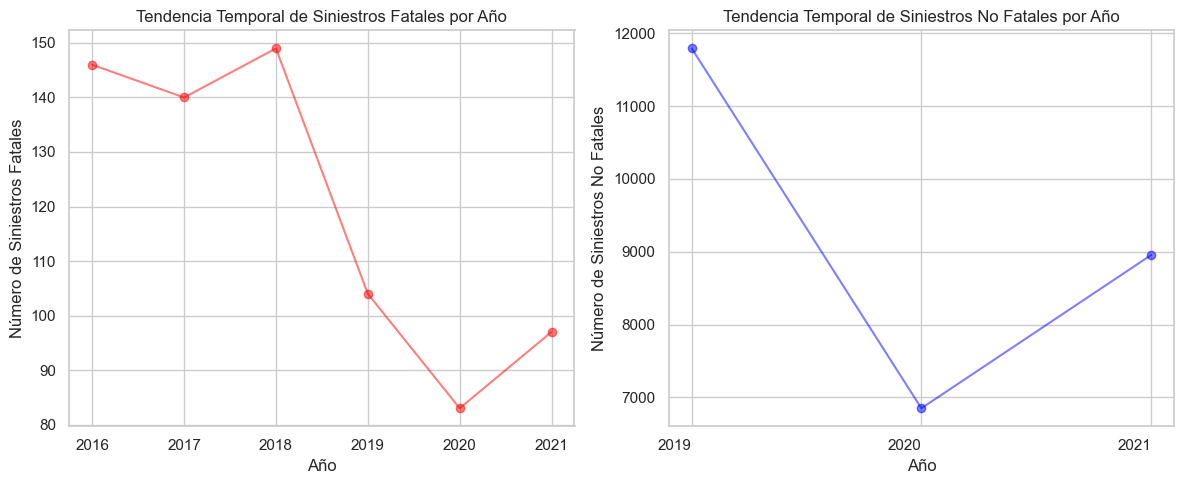

In [31]:
# Creamos dos gráficos diferentes
plt.figure(figsize=(12, 5))

# Primer gráfico para siniestros fatales
plt.subplot(1, 2, 1)
plt.plot(siniestros_fatal_por_anio.index, siniestros_fatal_por_anio, label="Fatal", marker="o", alpha=0.5, color="red")
plt.title("Tendencia Temporal de Siniestros Fatales por Año")
plt.xlabel("Año")
plt.ylabel("Número de Siniestros Fatales")
plt.grid(True)

# Segundo gráfico para siniestros no fatales
plt.subplot(1, 2, 2)
plt.plot(siniestros_no_fatal_por_anio.index, siniestros_no_fatal_por_anio, label="No Fatal", marker="o", alpha=0.5, color="blue")
plt.title("Tendencia Temporal de Siniestros No Fatales por Año")
plt.xlabel("Año")
plt.ylabel("Número de Siniestros No Fatales")
plt.grid(True)

# Establecemos las etiquetas del eje x
plt.xticks(siniestros_no_fatal_por_anio.index, [str(int(x)) for x in siniestros_no_fatal_por_anio.index], ha="right")

# Ajustamos el diseño de los gráficos
plt.tight_layout()
plt.show()

Según los gráficos, se destaca una disminución considerable en la cantidad de incidentes no fatales desde el 2019 hasta el 2020. No obstante, esta tendencia positiva dio un giro inesperado en el 2021, cuando los accidentes no fatales volvieron a experimentar un aumento.
Por otro lado, entre el año 2018 y 2019, la cantidad de siniestros fatales disminuyó considerablemente, tendencia que continuó hasta el año 2020. Sin embargo, la cantidad de estos siniestros se elevaron para el año 2021.

##### Siniestros por Mes

In [32]:
# Filtramos por gravedad igual a "fatal" (víctimas fatales)
siniestros_fatal = siniestros_cleaned[siniestros_cleaned["gravedad"] == "fatal"]

# Filtramos por gravedad diferente de "fatal" (víctimas no fatales)
siniestros_no_fatal = siniestros_cleaned[siniestros_cleaned["gravedad"] != "fatal"]

# Agrupamos por mes y contamos el número de siniestros en cada mes
siniestros_fatal_por_mes = siniestros_fatal.groupby(siniestros_fatal["month"]).size()
siniestros_no_fatal_por_mes = siniestros_no_fatal.groupby("month").size()

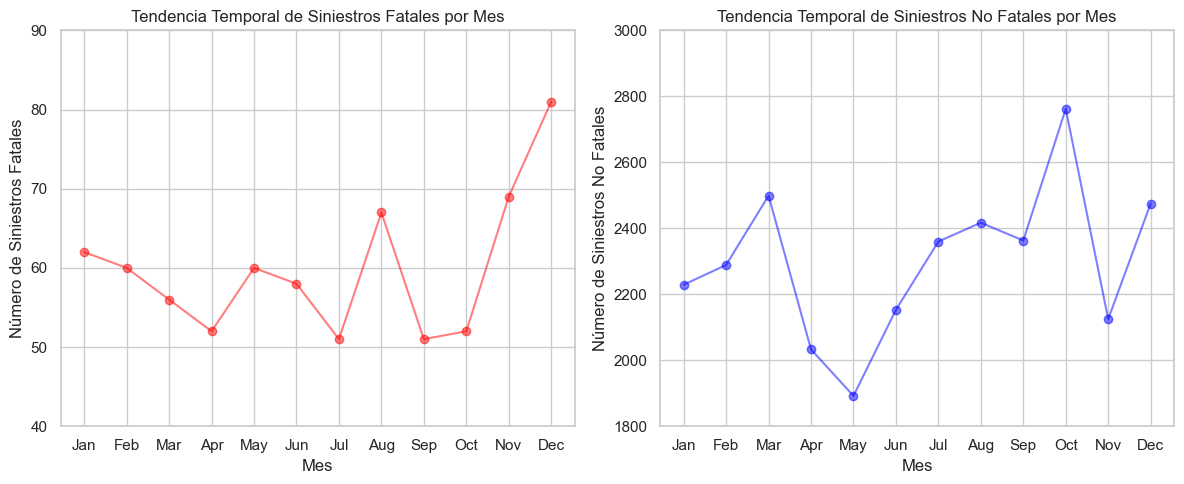

In [33]:
# Creamos dos gráficos diferentes
plt.figure(figsize=(12, 5))

# Primer gráfico para siniestros fatales por mes
plt.subplot(1, 2, 1)
plt.plot(siniestros_fatal_por_mes.index, siniestros_fatal_por_mes, label="Fatal", marker="o", alpha=0.5, color="red")
plt.title("Tendencia Temporal de Siniestros Fatales por Mes")
plt.xlabel("Mes")
plt.ylabel("Número de Siniestros Fatales")
plt.xticks(range(1, 13), calendar.month_abbr[1:])  # Usar abreviaturas de meses
plt.ylim(40, 90)  # Ajustar el rango del eje y
plt.grid(True)

# Segundo gráfico para siniestros no fatales por mes
plt.subplot(1, 2, 2)
plt.plot(siniestros_no_fatal_por_mes.index, siniestros_no_fatal_por_mes, label="No Fatal", marker="o", alpha=0.5, color="blue")
plt.title("Tendencia Temporal de Siniestros No Fatales por Mes")
plt.xlabel("Mes")
plt.ylabel("Número de Siniestros No Fatales")
plt.xticks(range(1, 13), calendar.month_abbr[1:])  # Usar abreviaturas de meses
plt.ylim(1800, 3000)  # Ajustar el rango del eje y
plt.grid(True)

# Ajustamos el diseño de los gráficos
plt.tight_layout()
plt.show()

En los siniestros fatales, se observa que diciembre, noviembre y agosto concentran la mayor cantidad de estos, en contraste con septiembre y octubre. Miestras que, para el caso de los siniestros no fatales, se destacan octubre, marzo y diciembre como los meses con la mayor cantidad de estos, por lo contrario, mayo y abril registran una menor incidencia.

##### Siniestros por Franja Horaria

In [34]:
# Filtramos por gravedad igual a "fatal" (víctimas fatales)
siniestros_fatal = siniestros_cleaned[siniestros_cleaned["gravedad"] == "fatal"].dropna(subset=['franja_hora'])

# Filtramos por gravedad diferente de "fatal" (víctimas no fatales)
siniestros_no_fatal = siniestros_cleaned[siniestros_cleaned["gravedad"] != "fatal"].dropna(subset=['franja_hora'])

# Obtenemos la lista completa de franjas horarias (unión de ambas categorías)
franjas_horarias = np.union1d(siniestros_fatal["franja_hora"].unique(), siniestros_no_fatal["franja_hora"].unique())

# Agrupamos y contamos la cantidad de siniestros en cada categoría para cada franja horaria
fatal_por_horario = siniestros_fatal.groupby("franja_hora").size().reindex(franjas_horarias, fill_value=0)
no_fatal_por_horario = siniestros_no_fatal.groupby("franja_hora").size().reindex(franjas_horarias, fill_value=0)

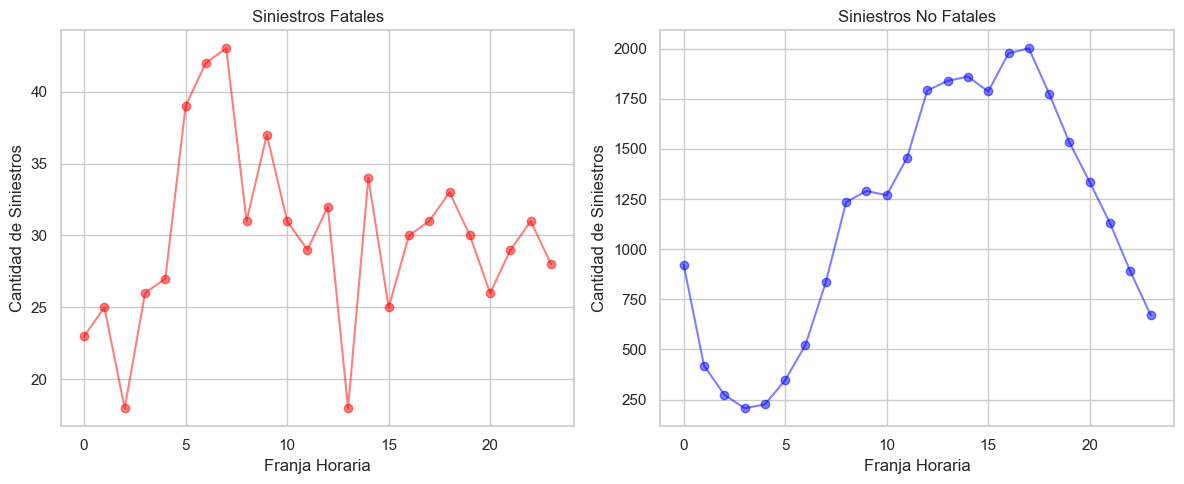

In [35]:
# Configuramos la figura y los subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Graficamos la línea para siniestros fatales
axes[0].plot(franjas_horarias, fatal_por_horario, label="Fatal", color="red", alpha=0.5, marker="o")
axes[0].set_title("Siniestros Fatales")
axes[0].set_xlabel("Franja Horaria")
axes[0].set_ylabel("Cantidad de Siniestros")
axes[0].grid(True)

# Graficamos la línea para siniestros no fatales
axes[1].plot(franjas_horarias, no_fatal_por_horario, label="No Fatal", color="blue", alpha=0.5, marker="o")
axes[1].set_title("Siniestros No Fatales")
axes[1].set_xlabel("Franja Horaria")
axes[1].set_ylabel("Cantidad de Siniestros")
axes[1].grid(True)

# Ajustamos el diseño para evitar superposiciones
plt.tight_layout()
plt.show()

En siniestros no fatales, se percibe un incremento constante desde las 4 de la mañana hasta las 6 de la tarde, alcanzando su punto álgido durante este periodo. Posterior a las 6 de la tarde, el número de accidentes experimenta una disminución gradual hora tras hora hasta el cierre del día. Notablemente, las horas que exhiben la mayor concentración de accidentes no fatales abarcan desde las 12 pm hasta las 5 pm.

En contraste, para los accidentes fatales, la mayor incidencia se concentra entre las 6 y 7 de la mañana. En las horas menos propensas a accidentes fatales, destacan las 2 de la mañana y la 1 de la tarde. Este análisis temporal proporciona información crucial para comprender los momentos críticos del día y puede orientar estrategias de prevención específicas en función de la gravedad de los siniestros.

##### Siniestros por Tipo de Calle

In [36]:
# Filtramos por gravedad igual a "fatal" (víctimas fatales)
siniestros_fatal = siniestros_cleaned[siniestros_cleaned["gravedad"] == "fatal"]

# Filtramos por gravedad diferente de "fatal" (víctimas no fatales)
siniestros_no_fatal = siniestros_cleaned[siniestros_cleaned["gravedad"] != "fatal"]

# Obtenemos la distribución de siniestros por tipo de calle
tipo_calle_fatal = siniestros_fatal["tipo_calle"].value_counts()
tipo_calle_no_fatal = siniestros_no_fatal["tipo_calle"].value_counts()

# Obtener la lista de tipos de calle
tipos_calle = np.unique(siniestros_cleaned["tipo_calle"].dropna())

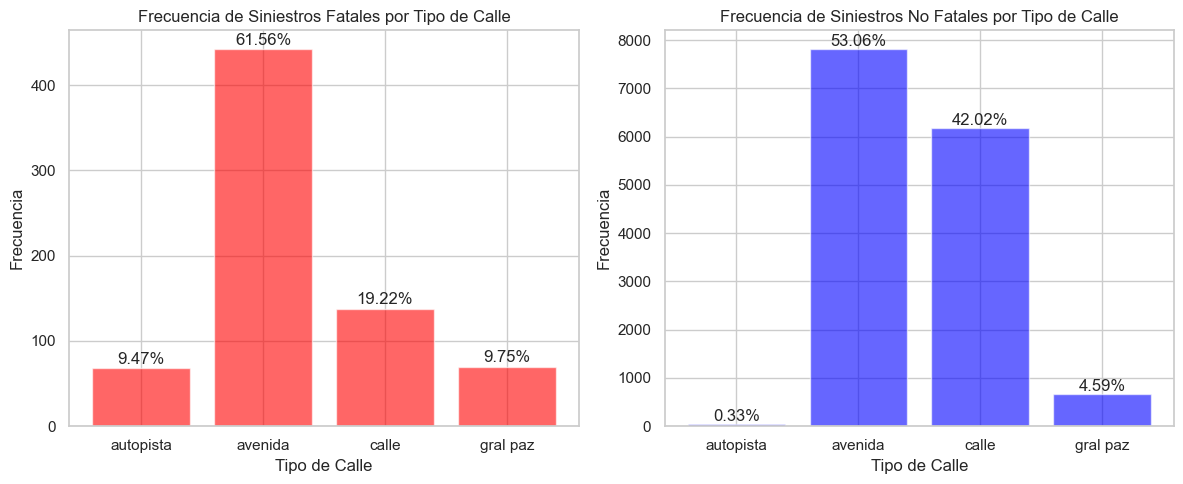

In [37]:
# Configuramos la figura y los subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Creamos el gráfico de barras agrupado para siniestros fatales con frecuencia y porcentaje
frecuencia_fatal = tipo_calle_fatal.reindex(tipos_calle, fill_value=0)
porcentaje_fatal = frecuencia_fatal / frecuencia_fatal.sum() * 100
axes[0].bar(tipos_calle, frecuencia_fatal, color='red', alpha=0.6)
for i, v in enumerate(frecuencia_fatal):
    axes[0].text(i, v + 2, f"{porcentaje_fatal.iloc[i]:.2f}%", ha="center", va="bottom")
axes[0].set_title("Frecuencia de Siniestros Fatales por Tipo de Calle")
axes[0].set_xlabel("Tipo de Calle")
axes[0].set_ylabel("Frecuencia")
axes[0].grid(True)

# Creamos el gráfico de barras agrupado para siniestros no fatales con frecuencia y porcentaje
frecuencia_no_fatales = tipo_calle_no_fatal.reindex(tipos_calle, fill_value=0)
porcentaje_no_fatales = frecuencia_no_fatales / frecuencia_no_fatales.sum() * 100
axes[1].bar(tipos_calle, frecuencia_no_fatales, color='blue', alpha=0.6)

for i, v in enumerate(frecuencia_no_fatales):
    axes[1].text(i, v + 2, f"{porcentaje_no_fatales.iloc[i]:.2f}%", ha="center", va="bottom")
axes[1].set_title("Frecuencia de Siniestros No Fatales por Tipo de Calle")
axes[1].set_xlabel("Tipo de Calle")
axes[1].set_ylabel("Frecuencia")
axes[1].grid(True)

# Ajustamos el diseño para evitar superposiciones
plt.tight_layout()

# Mostramos los gráficos
plt.show()

La mayoría de los siniestros, tanto fatales como no fatales, tienen lugar predominantemente en avenidas, seguidas por calles y autopistas en menor medida. No obstante, al analizar específicamente los accidentes fatales, las avenidas destacan de manera significativa, representando el 61% de los casos.

##### Siniestros por Comuna

In [38]:
# Filtramos por gravedad igual a "fatal" (víctimas fatales) y comuna no nula
siniestros_fatal = siniestros_cleaned[(siniestros_cleaned["gravedad"] == "fatal") & siniestros_cleaned["comuna"].notnull()]

# Filtramos por gravedad diferente de "fatal" (víctimas no fatales) y comuna no nula
siniestros_no_fatal = siniestros_cleaned[(siniestros_cleaned["gravedad"] != 'fatal') & siniestros_cleaned["comuna"].notnull()]

# Agrupamos por comuna y contar el número de siniestros en cada comuna
siniestros_fatal_por_comuna = siniestros_fatal.groupby("comuna").size()
siniestros_no_fatal_por_comuna = siniestros_no_fatal.groupby("comuna").size()

# Calcularmos porcentaje para cada comuna
porcentaje_fatal = (siniestros_fatal_por_comuna / siniestros_fatal_por_comuna.sum()) * 100
porcentaje_no_fatal = (siniestros_no_fatal_por_comuna / siniestros_no_fatal_por_comuna.sum()) * 100

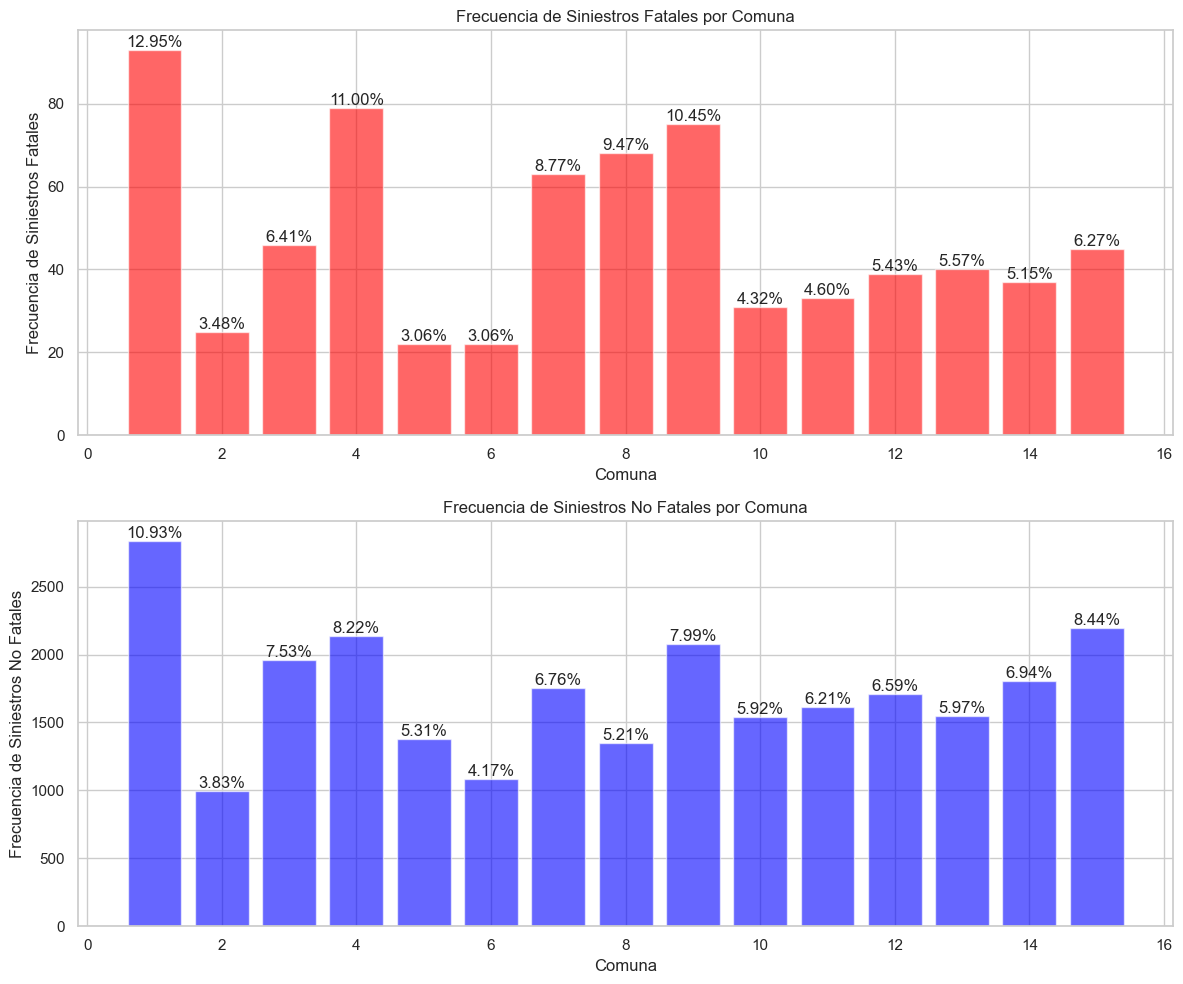

In [39]:
# Creamos dos gráficos uno debajo del otro
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Primer gráfico para siniestros fatales por comuna
bar1 = ax1.bar(siniestros_fatal_por_comuna.index, siniestros_fatal_por_comuna, color='red', alpha=0.6)
ax1.set_title("Frecuencia de Siniestros Fatales por Comuna")
ax1.set_xlabel("Comuna")
ax1.set_ylabel("Frecuencia de Siniestros Fatales")

# Mostrar el porcentaje sobre cada barra
for rect, percentage in zip(bar1, porcentaje_fatal):
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width()/2, height, f'{percentage:.2f}%',
             ha='center', va='bottom')

# Segundo gráfico para siniestros no fatales por comuna
bar2 = ax2.bar(siniestros_no_fatal_por_comuna.index, siniestros_no_fatal_por_comuna, color='blue', alpha=0.6)
ax2.set_title('Frecuencia de Siniestros No Fatales por Comuna')
ax2.set_xlabel('Comuna')
ax2.set_ylabel('Frecuencia de Siniestros No Fatales')

# Mostramos el porcentaje sobre cada barra
for rect, percentage in zip(bar2, porcentaje_no_fatal):
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width()/2, height, f'{percentage:.2f}%',
             ha='center', va='bottom')

# Ajustamos el diseño de los gráficos
plt.tight_layout()
plt.show()

En los accidentes fatales notamos que la mayor cantidad de siniestros ocurren en las comunas: 1, 4 y 9; mientras que para los siniestros no fatales tenemos la 1, 15, 4.

##### Siniestros por Rol

In [40]:
# Filtrar por gravedad igual a "fatal" y rol no nulo
siniestros_fatal = siniestros_cleaned[(siniestros_cleaned["gravedad"] == "fatal") & siniestros_cleaned["rol"].notnull()]

# Contamos la frecuencia de cada rol
frecuencia_roles = siniestros_fatal["rol"].value_counts()

# Calculamos el porcentaje para cada rol
porcentaje_roles = (frecuencia_roles / frecuencia_roles.sum()) * 100

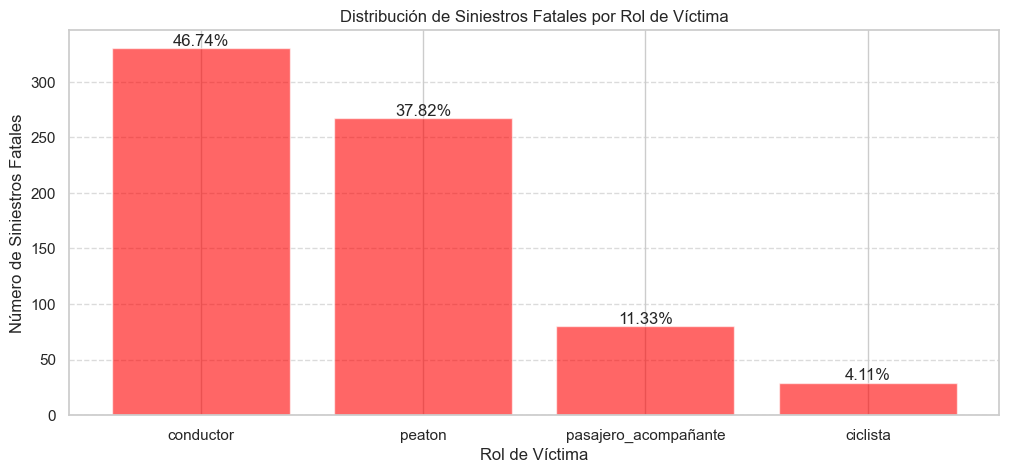

In [41]:
# Creamos un gráfico de barras
plt.figure(figsize=(12, 5))
bars = plt.bar(frecuencia_roles.index, frecuencia_roles, color="red", alpha=0.6)

# Alineamos las etiquetas del eje x al centro de cada barra
plt.xticks(rotation=0, ha="center")

# Mostramos el porcentaje sobre cada barra
for bar, porcentaje in zip(bars, porcentaje_roles):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{porcentaje:.2f}%',
             ha="center", va="bottom")

plt.title("Distribución de Siniestros Fatales por Rol de Víctima")
plt.xlabel("Rol de Víctima")
plt.ylabel("Número de Siniestros Fatales")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostramos el gráfico
plt.show()

Para el caso de siniestros fatales observamos que las personas que conducen son las que tienen más probabilidad de fallecer, evidenciándose en la gráfica con un 46.74%.

##### Siniestros por Tipo de Vehículo Víctima

In [42]:
# Filtramos por gravedad igual a "fatal" y comuna no nula
siniestros_fatal = siniestros_cleaned[(siniestros_cleaned["gravedad"] == "fatal")]

# Filtramos por gravedad diferente de "fatal" y comuna no nula
siniestros_no_fatal = siniestros_cleaned[(siniestros_cleaned["gravedad"] != "fatal")]

# Contamos la frecuencia de cada tipo de vehículo víctima en siniestros fatales
frecuencia_vehiculo_victima_fatal = siniestros_fatal["vehiculo_victima"].value_counts()

# Contamos la frecuencia de cada tipo de vehículo víctima en siniestros no fatales
frecuencia_vehiculo_victima_no_fatal = siniestros_no_fatal["vehiculo_victima"].value_counts()

# Calculamos los porcentajes
porcentaje_vehiculo_victima_fatal = (frecuencia_vehiculo_victima_fatal / frecuencia_vehiculo_victima_fatal.sum()) * 100
porcentaje_vehiculo_victima_no_fatal = (frecuencia_vehiculo_victima_no_fatal / frecuencia_vehiculo_victima_no_fatal.sum()) * 100

# Filtramos tipos de vehículos con 0.00%
porcentaje_vehiculo_victima_fatal = porcentaje_vehiculo_victima_fatal[porcentaje_vehiculo_victima_fatal > 0]
porcentaje_vehiculo_victima_no_fatal = porcentaje_vehiculo_victima_no_fatal[porcentaje_vehiculo_victima_no_fatal > 0]

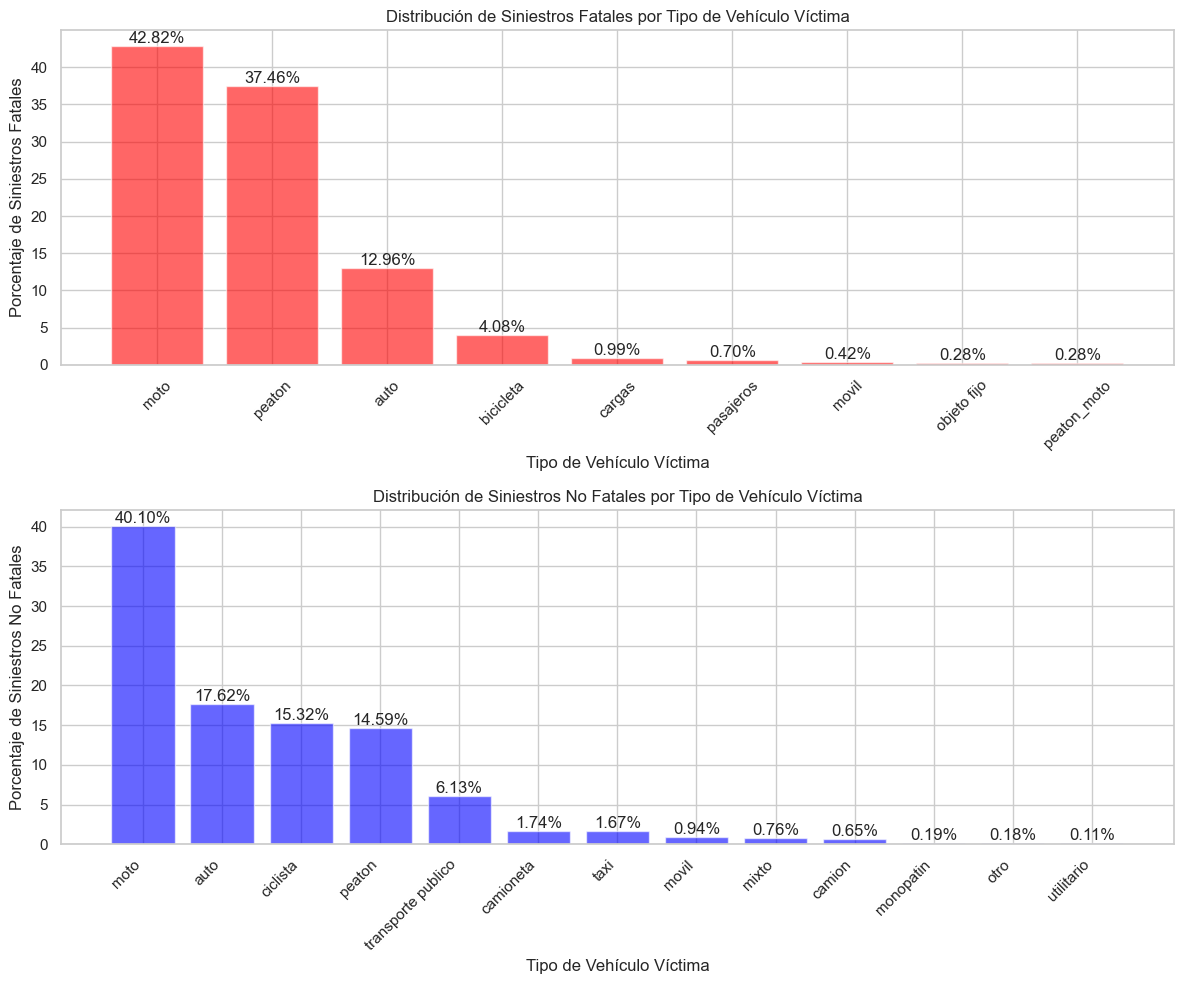

In [43]:
# Creamos dos gráficos uno debajo del otro
plt.figure(figsize=(12, 10))

# Primer gráfico para vehículos víctima en siniestros fatales
plt.subplot(2, 1, 1)
bars1 = plt.bar(porcentaje_vehiculo_victima_fatal.index, porcentaje_vehiculo_victima_fatal, color="red", alpha=0.6)
plt.title("Distribución de Siniestros Fatales por Tipo de Vehículo Víctima")
plt.xlabel("Tipo de Vehículo Víctima")
plt.ylabel("Porcentaje de Siniestros Fatales")
plt.xticks(rotation=45, ha="center")

# Mostramos porcentaje sobre cada barra
for rect in bars1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height, f"{height:.2f}%",
            ha="center", va="bottom")

# Segundo gráfico para vehículos víctima en siniestros no fatales
plt.subplot(2, 1, 2)
bars2 = plt.bar(porcentaje_vehiculo_victima_no_fatal.index, porcentaje_vehiculo_victima_no_fatal, color="blue", alpha=0.6)
plt.title("Distribución de Siniestros No Fatales por Tipo de Vehículo Víctima")
plt.xlabel("Tipo de Vehículo Víctima")
plt.ylabel("Porcentaje de Siniestros No Fatales")
plt.xticks(rotation=45, ha="right")

# Mostramos porcentaje sobre cada barra
for rect in bars2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height, f"{height:.2f}%",
            ha="center", va="bottom")

# Ajustamos el diseño de los gráficos
plt.tight_layout()
plt.show()

En esta variable tenemos como top 3 para siniestros Fatales a las motos, los peatones y los autos. Mientras que para el caso de los Siniestros No Fatales se repite moto en primer lugar, seguido de autos y ciclistas.

##### Siniestros por Tipo de Vehículo Acusado

In [44]:
# Filtramos por gravedad igual a "fatal" y comuna no nula
siniestros_fatal = siniestros_cleaned[(siniestros_cleaned["gravedad"] == "fatal")]

# Filtramos por gravedad diferente de "fatal" y comuna no nula
siniestros_no_fatal = siniestros_cleaned[(siniestros_cleaned["gravedad"] != "fatal")]

# Contamos la frecuencia de cada tipo de vehículo acusado en siniestros fatales
frecuencia_vehiculo_acusado_fatal = siniestros_fatal["vehiculo_acusado"].value_counts()

# Contamos la frecuencia de cada tipo de vehículo acusado en siniestros no fatales
frecuencia_vehiculo_acusado_no_fatal = siniestros_no_fatal["vehiculo_acusado"].value_counts()

# Calculamos los porcentajes
porcentaje_vehiculo_acusado_fatal = (frecuencia_vehiculo_acusado_fatal / frecuencia_vehiculo_acusado_fatal.sum()) * 100
porcentaje_vehiculo_acusado_no_fatal = (frecuencia_vehiculo_acusado_no_fatal / frecuencia_vehiculo_acusado_no_fatal.sum()) * 100

# Filtramos tipos de vehículos con 0.00%
porcentaje_vehiculo_acusado_fatal = porcentaje_vehiculo_acusado_fatal[porcentaje_vehiculo_acusado_fatal > 0]
porcentaje_vehiculo_acusado_no_fatal = porcentaje_vehiculo_acusado_no_fatal[porcentaje_vehiculo_acusado_no_fatal > 0]

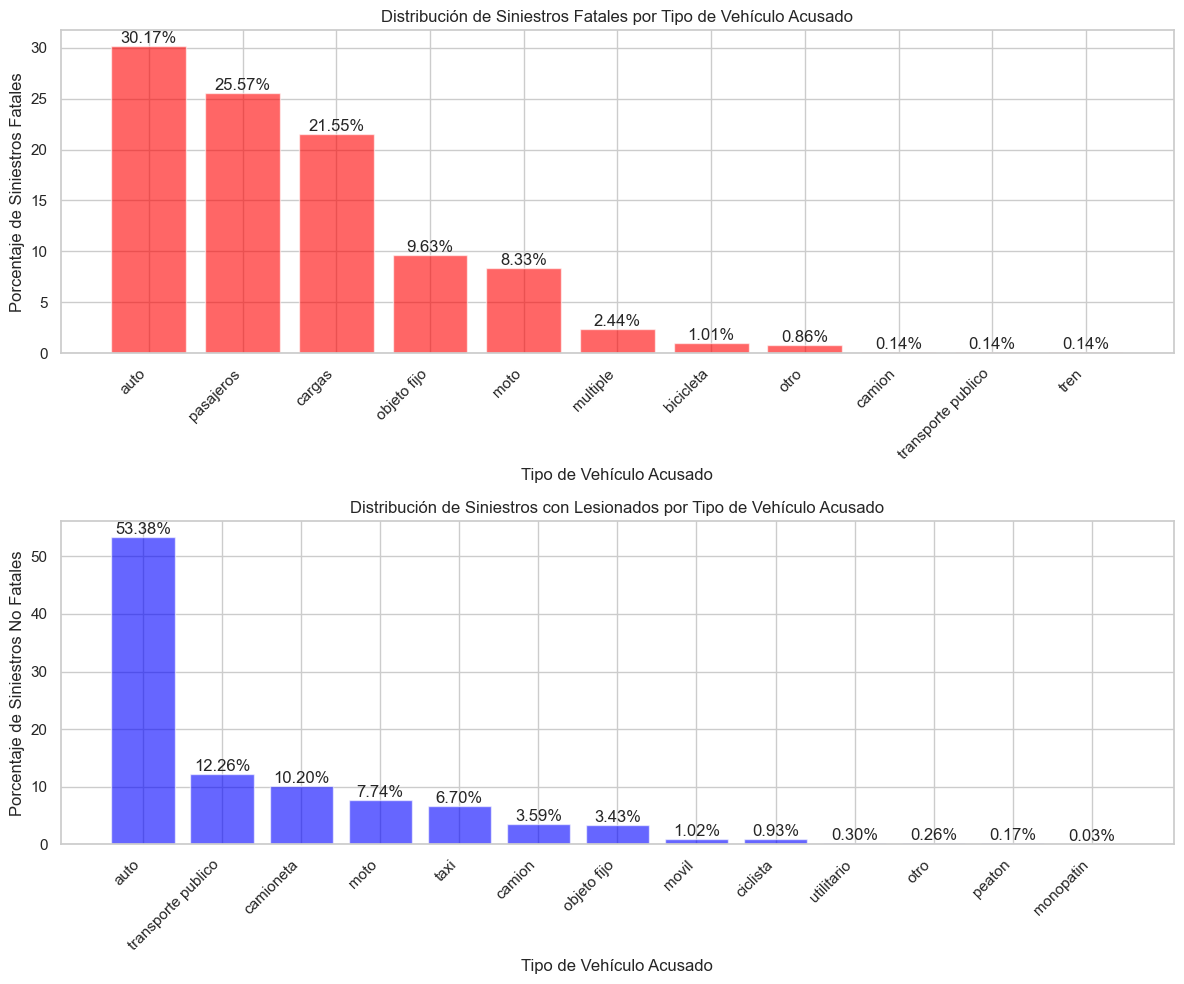

In [45]:
# Creamos dos gráficos uno debajo del otro
plt.figure(figsize=(12, 10))

# Primer gráfico para vehículos acusados en siniestros fatales
plt.subplot(2, 1, 1)
bars1 = plt.bar(porcentaje_vehiculo_acusado_fatal.index, porcentaje_vehiculo_acusado_fatal, color="red", alpha=0.6)
plt.title("Distribución de Siniestros Fatales por Tipo de Vehículo Acusado")
plt.xlabel("Tipo de Vehículo Acusado")
plt.ylabel("Porcentaje de Siniestros Fatales")
plt.xticks(rotation=45, ha='right')

# Mostramos porcentaje sobre cada barra
for rect in bars1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height, f"{height:.2f}%",
            ha="center", va="bottom")

# Segundo gráfico para vehículos acusados en siniestros no fatales
plt.subplot(2, 1, 2)
bars2 = plt.bar(porcentaje_vehiculo_acusado_no_fatal.index, porcentaje_vehiculo_acusado_no_fatal, color="blue", alpha=0.6)
plt.title("Distribución de Siniestros con Lesionados por Tipo de Vehículo Acusado")
plt.xlabel("Tipo de Vehículo Acusado")
plt.ylabel("Porcentaje de Siniestros No Fatales")
plt.xticks(rotation=45, ha='right')

# Mostramos porcentaje sobre cada barra
for rect in bars2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height, f"{height:.2f}%",
            ha="center", va="bottom")

# Ajustar el diseño de los gráficos
plt.tight_layout()
plt.show()

Para el caso de estos vehiculos en los siniestros fatales, tenemos: autos, pasajeros y carga; mientras que para siniestros no fatales nuevamente se repite auto como primer lugar, seguido de transporte público y camioneta.

##### Siniestros por Género

In [46]:
# Filtramos por gravedad igual a "fatal"
siniestros_fatal = siniestros_cleaned[(siniestros_cleaned["gravedad"] == "fatal") & siniestros_cleaned["sexo"].notnull()]

# Filtramos por gravedad diferente de "fatal"
siniestros_no_fatal = siniestros_cleaned[(siniestros_cleaned["gravedad"] != "fatal") & siniestros_cleaned["sexo"].notnull()]

# Contamos la frecuencia de cada género en siniestros fatales
frecuencia_genero_fatal = siniestros_fatal["sexo"].value_counts()

# Contamos la frecuencia de cada género en siniestros no fatales
frecuencia_genero_no_fatal = siniestros_no_fatal["sexo"].value_counts()

# Calculamos los porcentajes
porcentaje_genero_fatal = (frecuencia_genero_fatal / frecuencia_genero_fatal.sum()) * 100
porcentaje_genero_no_fatal = (frecuencia_genero_no_fatal / frecuencia_genero_no_fatal.sum()) * 100

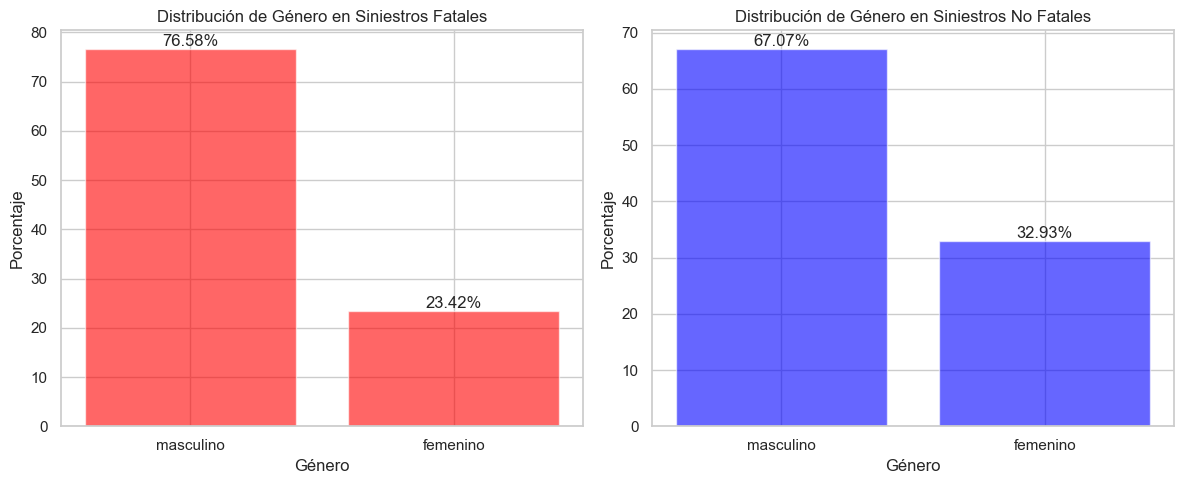

In [47]:
# Crear dos gráficos uno al lado del otro
plt.figure(figsize=(12, 5))

# Primer gráfico para siniestros fatales por género
plt.subplot(1, 2, 1)
bars1 = plt.bar(porcentaje_genero_fatal.index, porcentaje_genero_fatal, color="red", alpha=0.6)
plt.title("Distribución de Género en Siniestros Fatales")
plt.xlabel("Género")
plt.ylabel("Porcentaje")
plt.xticks(rotation=0, ha="center")

# Mostramos porcentaje sobre cada barra
for rect in bars1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height, f"{height:.2f}%", ha="center", va="bottom")

# Segundo gráfico para siniestros no fatales por género
plt.subplot(1, 2, 2)
bars2 = plt.bar(porcentaje_genero_no_fatal.index, porcentaje_genero_no_fatal, color="blue", alpha=0.6)
plt.title("Distribución de Género en Siniestros No Fatales")
plt.xlabel("Género")
plt.ylabel("Porcentaje")
plt.xticks(rotation=0, ha="center")

# Mostramos porcentaje sobre cada barra
for rect in bars2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height, f"{height:.2f}%", ha="center", va="bottom")

# Ajustamos el diseño de los gráficos
plt.tight_layout()
plt.show()

Para esta variable en ambos tipos de siniestros la gran mayoría de las víctimas son hombres (masculino); siendo para siniestros fatales un 76.58% mientras que para siniestros no fatales un 67.07%.

##### Siniestros por Edad

In [48]:
# Filtramos por gravedad igual a "fatal"
siniestros_fatal = siniestros_cleaned[(siniestros_cleaned["gravedad"] == "fatal") & siniestros_cleaned["edad"].notnull()]

# Filtramos por gravedad diferente de "fatal"
siniestros_no_fatal = siniestros_cleaned[(siniestros_cleaned["gravedad"] != "fatal") & siniestros_cleaned["edad"].notnull()]

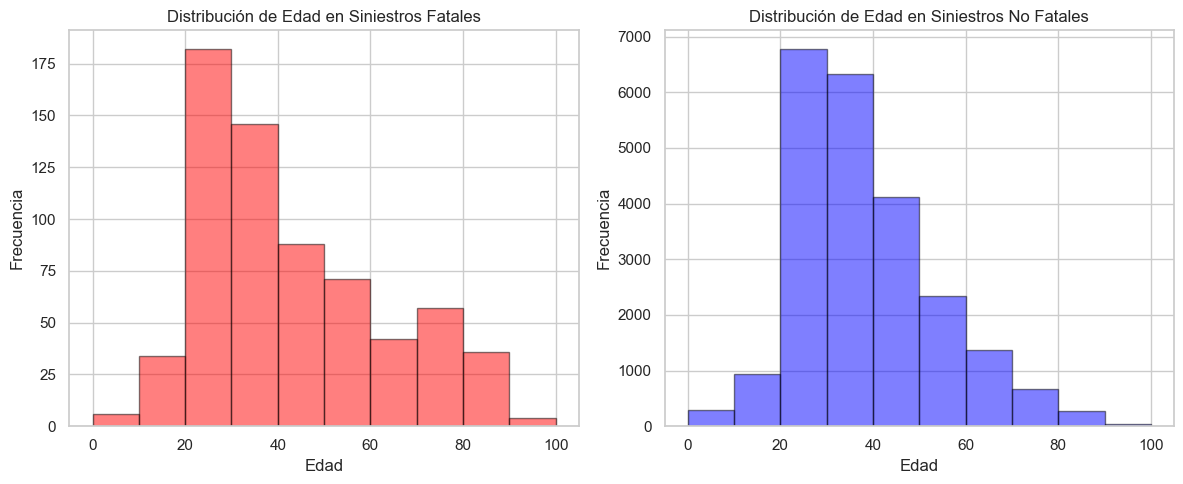

In [49]:
# Creamos dos gráficos uno al lado del otro
plt.figure(figsize=(12, 5))

# Primer gráfico para siniestros fatales por edad
plt.subplot(1, 2, 1)
bins_fatal = range(0, 101, 10)  # Crear bins de 10 en 10 años
plt.hist(siniestros_fatal["edad"], bins=bins_fatal, color="red", alpha=0.5, edgecolor="black")
plt.title("Distribución de Edad en Siniestros Fatales")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

# Segundo gráfico para siniestros no fatales por edad
plt.subplot(1, 2, 2)
bins_lesionados = range(0, 101, 10)  # Crear bins de 10 en 10 años
plt.hist(siniestros_no_fatal["edad"], bins=bins_lesionados, color="blue", alpha=0.5, edgecolor="black")
plt.title("Distribución de Edad en Siniestros No Fatales")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

# Ajustar el diseño de los gráficos
plt.tight_layout()
plt.show()

Como se puede observar, en ambos casos de siniestro (fatal y no fatal) prevalece el rango de víctimas entre los 20 y los 40 años de edad.